In [54]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos
from matplotlib import colors as c
from matplotlib import cm
from matplotlib import ticker


plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)


rgba_to_hex = lambda rgba : '#'+''.join([f'{int(v*255):02x}' for v in rgba])
color = rgba_to_hex(cm.viridis(.25))
print(color)

#3a528bff


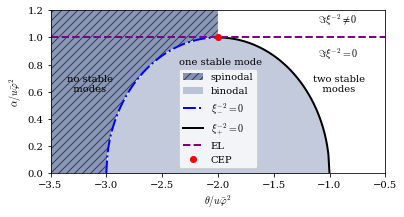

In [180]:
fig, ax = plt.subplots(figsize=(6, 3))


r0 = np.linspace(-3.5, -.5, 1000)
s0 = np.linspace(0, 1.2, 1000)
r, s = np.meshgrid(r0, s0)
l1 = lambda r, s: r + 2 + np.sqrt(1 - s**2 + 0j)
l2 = lambda r, s: r + 2 - np.sqrt(1 - s**2 + 0j)

L = l2(r, s).real
m = L<0
one = np.ones_like(r)
# ax.contourf(r, s, np.ma.masked_where(m, one), colors=color,  alpha=.6)


n = 200
x1 = np.linspace(-4, -3, n)
x2 = np.linspace(-3, -2, n)
y = np.concatenate([np.zeros_like(x1), np.sqrt(1 - (x2+2)**2)])
x = np.concatenate([x1, x2])
ax.fill_between(x, y, 1.2, color=color, alpha=0.6, label="spinodal", hatch='///', linewidth=0.0, edgecolor='#00000000')

x3 = np.linspace(-3, -1, n)
ax.fill_between(x3,  np.sqrt(1 - (x3+2)**2), 0, color=color,  alpha=0.3, linewidth=0.0, label="binodal")

ax.plot(x3[:n//2],  np.sqrt(1 - (x3[:n//2]+2)**2), 'b-.', label='$\\xi_-^{-2} = 0$')
ax.plot(x3[n//2:],  np.sqrt(1 - (x3[n//2:]+2)**2), 'k-', label='$\\xi_+^{-2} = 0$')


L = l1(r, s).real
m = L<0
one = np.ones_like(r)

ax.plot([-3.5, -.5], [1, 1], '--', color='purple', label='EL')
ax.plot(-2, 1, 'ro', label='CEP')

ax.text(-1.1, 1.1, '$\\Im \\xi^{-2} \\neq 0 $')
ax.text(-1.1, .85, '$\\Im \\xi^{-2} = 0 $')

ax.text(-1.15, .6, 'two stable\n   modes')
ax.text(-2.35, .8, 'one stable mode')
ax.text(-3.35 , .6, 'no stable\n  modes')

ax.set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax.set_ylabel('$\\alpha / u \\bar \\varphi^2$')

ax.set_xlim(-3.5, -0.5)
ax.set_ylim(0, 1.2)

ax.legend(loc=8)

fig.savefig('l3.pdf',bbox_inches='tight')


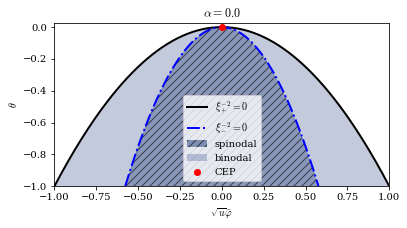

In [181]:
fig, ax = plt.subplots(figsize=(6,3))

k = 1/np.sqrt(3)
N = 200
x = np.linspace(-1, 1, N)
x2 = np.linspace(-k, k, N)
r1 = - x**2
r2 = - 3 * x**2

ax.plot(x, r1, "k-", label='$\\xi_+^{-2} = 0$')
ax.plot(x2, -3*x2**2, "b-.", label='$\\xi_-^{-2} = 0$')

ax.fill_between(x2,-3*x2**2,-1, color=color, alpha=0.6,label="spinodal", hatch='///', linewidth=0.0, edgecolor='#00000000')
ax.fill_between(x,r1,np.maximum(-np.ones_like(r2), r2), color=color, alpha=0.3,label="binodal", linewidth=0.0)

ax.plot(0, 0, 'ro', label='CEP')
ax.set_title("$\\alpha = %.1f$"%0)

ax.legend()
ax.set_ylabel("$\\theta$")
ax.set_xlabel("$\\sqrt{u} \\bar \\varphi$")
ax.set_ylim(-1, 0.025)
ax.set_xlim(-1, 1)

fig.savefig('l4.pdf',bbox_inches='tight')

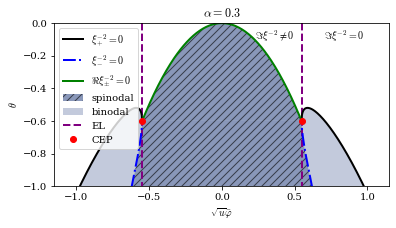

In [182]:
fig, ax = plt.subplots(figsize=(6, 3))

k = 1
N = 200


a = .3
x0 = np.sqrt(a) + 1e-10
x = np.linspace(-1, -x0, N)
r1 = - 2 * x**2 - np.sqrt(x**4 - a**2)
r2 = - 2 * x**2 + np.sqrt(x**4 - a**2)

ax.plot(x, r2, "k-", label='$\\xi_+^{-2} = 0$')
ax.plot(x, r1, "b-.", label='$\\xi_-^{-2} = 0$')
ax.plot(-x, r2, "k-")
ax.plot(-x, r1, "b-.")

x3 = np.linspace(-x0, x0, N)
r3 = -2*x3**2
ax.plot(x3, r3, 'g-', label='$\\Re \\xi_\\pm^{-2} = 0$')

rr = np.concatenate([r1, r3, r1[::-1]])
xx = np.concatenate([-x, x3, x[::-1]])
ax.fill_between(xx, rr, -1, color=color, alpha=0.6,label="spinodal", hatch='///', linewidth=0.0, edgecolor='#00000000')

ax.fill_between(x,r1,r2, color=color, alpha=0.3, linewidth=0.0, label="binodal")
ax.fill_between(-x,r1,r2, color=color, alpha=0.3, linewidth=0.0, )

ax.plot([x0, x0], [0, -1], '--', color='purple', label='EL', zorder=1)
ax.plot([-x0, -x0], [0, -1], '--', color='purple', zorder=1)

ax.plot(x0, -2*x0**2, 'ro', label='CEP')
ax.plot(-x0, -2*x0**2, 'ro')

ax.text(0.23, -.1, '$\\Im \\xi^{-2} \\neq 0 $')
ax.text(.7, -.1, '$\\Im \\xi^{-2} = 0 $')



ax.legend(loc=2)
ax.set_ylabel("$\\theta$")
ax.set_xlabel("$\\sqrt{u} \\bar \\varphi$")
ax.set_ylim(-1, 0)
ax.set_xlim(-1.15, 1.15)

ax.set_title("$\\alpha = %.1f$"%a)

fig.savefig('l5.pdf',bbox_inches='tight')